
Spotify Music Popularity Analysis
Goal: Analyze which genres and features are associated with high vs low popularity on Spotify.

Business Task / Objective: Analyze Two Questions:

    (a) Which genres and subgenres dominate in high popularity vs low popularity tracks?
    (b) Which features (danceability, energy, valence, etc.) are most correlated with track popularity

🗃️ Data Source and Description

    Sources:
        Spotify's historical track popularity data (updated 8 months ago) from high_popularity_spotify_data
        Spotify's historical track popularity data (updated 8 months ago) from low_popularity_spotify_data
    Format: CSV Files

Key Features :
🎵 Track Information

    track_id: Unique identifier for the track
    track_name: Name of the track
    track_artist: Artist(s) of the track
    track_album_name: Album name
    track_album_id: Unique album identifier
    track_album_release_date: Release date of the album

📊 Popularity & Playlists

    track_popularity: Popularity score (0–100, based on Spotify’s algorithm)
    playlist_name: Name of the playlist the track belongs to
    playlist_id: Unique playlist identifier
    playlist_genre: Broad genre category (e.g., pop, rock, jazz)
    playlist_subgenre: More specific subgenre (e.g., classic, mainstream)

🎶 Audio Features (from Spotify API)

    danceability: How suitable a track is for dancing (0.0 = least, 1.0 = most)
    energy: Intensity and activity level of the track (0.0 = calm, 1.0 = energetic)
    valence: Musical positivity (0.0 = sad/angry, 1.0 = happy/cheerful)
    acousticness: Confidence measure of whether the track is acoustic
    instrumentalness: Predicts if a track is instrumental (values closer to 1 = more instrumental)
    liveness: Probability that the track was performed live
    speechiness: Presence of spoken words (rap, podcasts score higher)
    loudness: Overall volume in decibels (dB)
    tempo: Beats per minute (BPM)
    duration_ms: Length of the track in milliseconds
    time_signature: Musical time signature (e.g., 4/4, 3/4)
    mode: Major (1) or minor (0) key
    key: Pitch class notation (0 = C, 1 = C♯/D♭, etc.)

🔗 Identifiers & Links

    id / uri: Spotify’s unique identifiers for the track
    track_href / analysis_url: URLs linking to Spotify’s track page and detailed audio analysis
    type: Type of object (usually “audio_features”)



In [23]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


high_popularity_spotify_data = pd.read_csv(Path('../datasets/high_popularity_spotify_data.csv'))
low_popularity_spotify_data = pd.read_csv(Path('../datasets/low_popularity_spotify_data.csv'))




In [24]:
high_popularity_spotify_data.head()


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [25]:
high_popularity_spotify_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [26]:
high_popularity_spotify_data.describe()


,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


In [28]:
high_popularity_spotify_data.value_counts()


energy   tempo    danceability  playlist_genre  loudness  liveness  valence  track_artist                           time_signature  speechiness  track_popularity  track_href                                                uri                                   track_album_name                        playlist_name      analysis_url                                                      track_id                track_name                            track_album_release_date  instrumentalness  track_album_id          mode  key  duration_ms  acousticness  id                      playlist_subgenre  type            playlist_id           
0.00161  140.997  0.138         ambient         -43.643   0.0951    0.155    Somnum Magnam                          1               0.0532       72                https://api.spotify.com/v1/tracks/6KzdWw8Hi1bz1lVw2AXDzb  spotify:track:6KzdWw8Hi1bz1lVw2AXDzb  Touches                                 Ambient Chill      https://api.spotify.com/v1/audio-analysis/6KzdWw

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(high_popularity_spotify_data, test_size=0.2, random_state=42, stratify=high_popularity_spotify_data['track_popularity'])


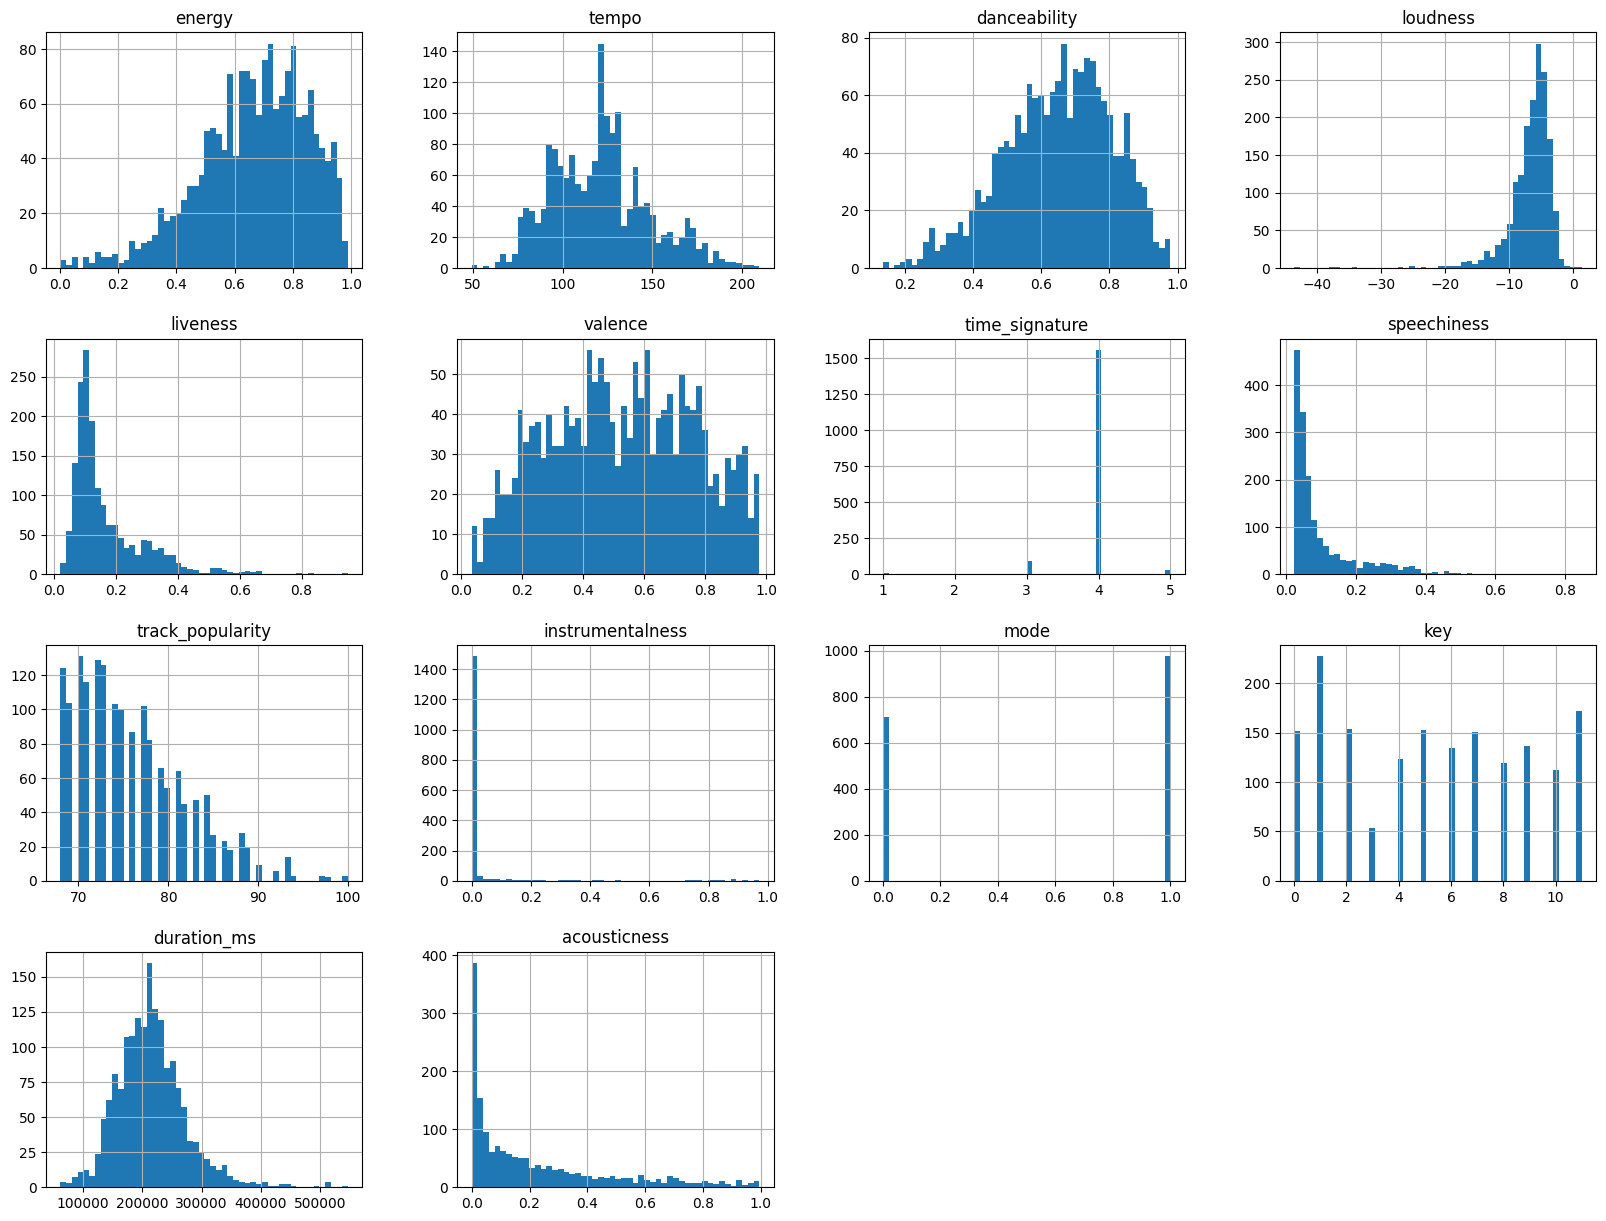

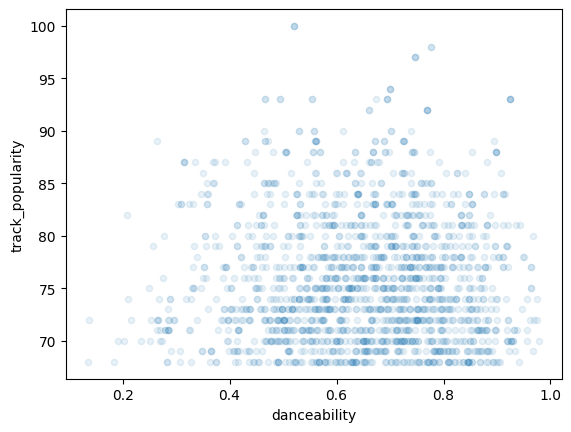

In [ ]:
high_popularity_spotify_data.hist(bins=50, figsize=(20,15))
plt.show()


